In [1]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg','pdf')

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
gamma = 1.4
T1 = 300
h1 = 40 #kJ
# cp = 1 #kJ
alpha = 5

Qnet = np.arange(0.1, 10, 0.1)
W12 = np.arange(0.1, 1, 0.1)
W34 = np.arange(0.1, 1, 0.1)
P = alpha*W12

# [Qnet, W12] = np.meshgrid(Qnet_, W12_)
# [Qnet, W34] = np.meshgrid(Qnet_, W34_)
# [P, W34] = np.meshgrid(P_, W34_)

In [3]:
def cp(T):
    b0 = 1006
    b1 = 0.008615
    b2 = 6.581e-4
    b3 = -7.131e-7
    b4 = 2.42e-10
    
    return (b0 + b1*T + b2*T**2 + b3*T**3 + b4*T**4)/1e3

In [4]:
xi2 = np.power(W12 + 1, gamma/(gamma + 1))
T2 = T1*np.power(xi2, (gamma - 1)/gamma)
H2 =  1 + W12

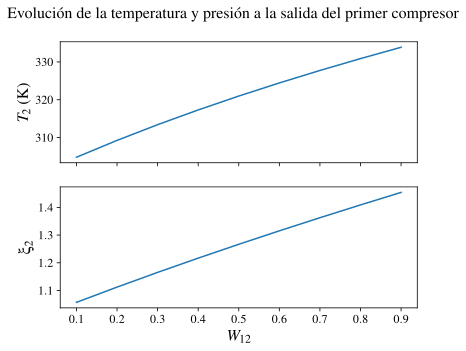

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True)
fig.suptitle(r'Evolución de la temperatura y presión a la salida del primer compresor')

axs[0].plot(W12, T2)
axs[0].set_ylabel(r'$T_2$ (K)')
axs[1].plot(W12, xi2)
axs[1].set_ylabel(r'$\xi_2$')
axs[1].set_xlabel(r'$W_{12}$')

plt.show()

In [6]:
H3 = Qnet[:, np.newaxis] + H2
T3 = T2 + Qnet[:, np.newaxis]*h1/cp(T2)
xi3 = xi2*np.power(T3/T2, (gamma - 1)/gamma)

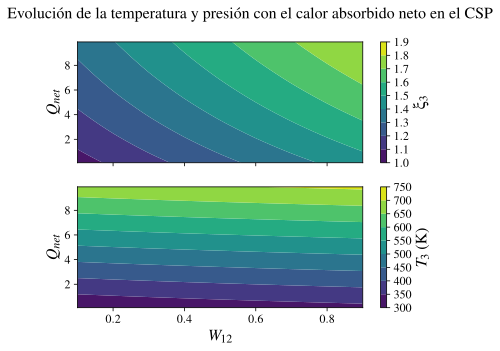

In [7]:
fig, axs = plt.subplots(2, 1, sharex=True)
fig.suptitle(r'Evolución de la temperatura y presión con el calor absorbido neto en el CSP')

c0 = axs[0].contourf(W12, Qnet, xi3)
cb0 = fig.colorbar(c0)
axs[0].set_ylabel(r'$Q_{net}$')
cb0.ax.set_ylabel(r'$\xi_3$')

c1 = axs[1].contourf(W12, Qnet, T3)
cb1 = fig.colorbar(c1)
cb1.ax.set_ylabel(r'$T_3$ (K)')
axs[1].set_xlabel(r'$W_{12}$')
axs[1].set_ylabel(r'$Q_{net}$')

plt.show()

In [8]:
xi4  = xi3*np.power(W34[:,np.newaxis].T/H3 + 1, gamma/(gamma - 1))
T4 = T3*np.power(xi4/xi3, (gamma - 1)/gamma)
H4 = H3 + W34

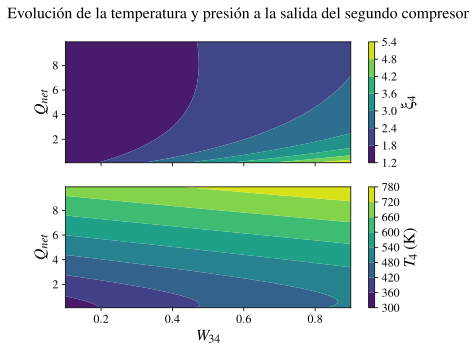

In [9]:
fig, axs = plt.subplots(2, 1, sharex=True)
fig.suptitle(r'Evolución de la temperatura y presión a la salida del segundo compresor')

c0 = axs[0].contourf(W34, Qnet, xi4)
cb0 = fig.colorbar(c0)
axs[0].set_ylabel(r'$Q_{net}$')
cb0.ax.set_ylabel(r'$\xi_4$')

c1 = axs[1].contourf(W34, Qnet, T4)
cb1 = fig.colorbar(c1)
cb1.ax.set_ylabel(r'$T_4$ (K)')
axs[1].set_xlabel(r'$W_{34}$')
axs[1].set_ylabel(r'$Q_{net}$')

plt.show()

In [10]:
H5 = P + H4
T5 = T4 + P*h1/cp(T4)
xi5 = xi4*np.power(T5/T4, (gamma - 1)/gamma)

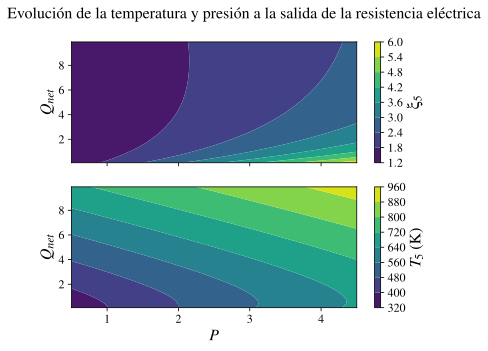

In [11]:
fig, axs = plt.subplots(2, 1, sharex=True)
fig.suptitle(r'Evolución de la temperatura y presión a la salida de la resistencia eléctrica')

c0 = axs[0].contourf(P, Qnet, xi5)
cb0 = fig.colorbar(c0)
axs[0].set_ylabel(r'$Q_{net}$')
cb0.ax.set_ylabel(r'$\xi_5$')

c1 = axs[1].contourf(P, Qnet, T5)
cb1 = fig.colorbar(c1)
cb1.ax.set_ylabel(r'$T_5$ (K)')
axs[1].set_xlabel(r'$P$')
axs[1].set_ylabel(r'$Q_{net}$')

plt.show()